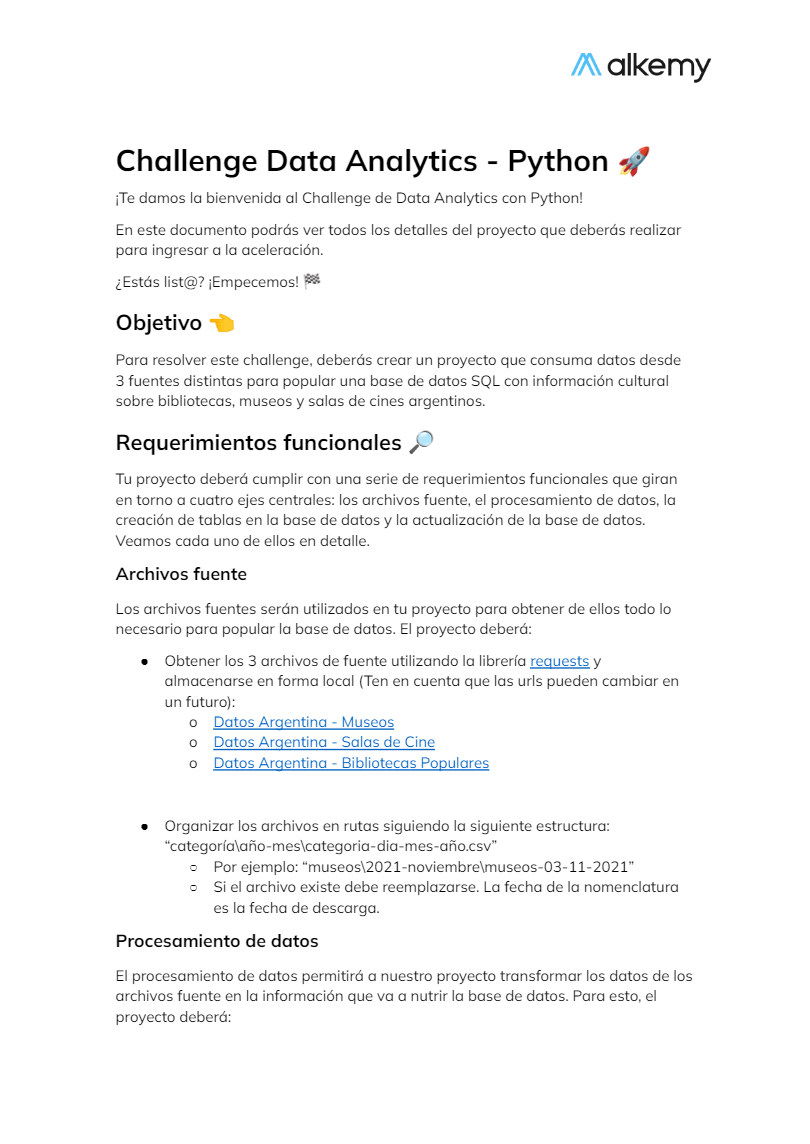


https://docer.com.ar/doc/8s0c0xx
https://www.pythonpool.com/python-decouple/

In [ ]:
https://datos.cultura.gob.ar/
https://datos.cultura.gob.ar/dataset/espacios-culturales-argentina-sinca


 Tu proyecto deberá cumplir con una serie de requerimientos funcionales que giran en torno a cuatro ejes centrales: los archivos fuente, el procesamiento de datos, la creación de tablas en la base de datos y la actualización de la base de datos. 
Veamos cada uno de ellos en detalle. 
Archivos fuente Los archivos fuentes serán utilizados en tu proyecto para obtener de ellos todo lo necesario para popular la base de datos. 
El proyecto deberá: 
        
        ● Obtener los 3 archivos de fuente utilizando la librería requests y almacenarse en forma local (Ten en cuenta que las urls pueden cambiar en un futuro): o Datos Argentina - Museos o Datos Argentina - Salas de Cine o Datos Argentina - Bibliotecas Populares 
        
        ● Organizar los archivos en rutas siguiendo la siguiente estructura: “categoría\año-mes\categoria-dia-mes-año.csv” ○ Por ejemplo: “museos\2021-noviembre\museos-03-11-2021” ○ Si el archivo existe debe reemplazarse. La fecha de la nomenclatura es la fecha de descarga. 


Procesamiento de datos El procesamiento de datos permitirá a nuestro proyecto transformar los datos de los archivos fuente en la información que va a nutrir la base de datos. 
Para esto, el proyecto deberá: 
        
        ● Normalizar toda la información de Museos, Salas de Cine y Bibliotecas Populares, para crear una única tabla que contenga: o cod_localidad o id_provincia o id_departamento o categoría o provincia o localidad o nombre o domicilio o código postal o número de teléfono o mail o web 
        ● Procesar los datos conjuntos para poder generar una tabla con la siguiente información: o Cantidad de registros totales por categoría o Cantidad de registros totales por fuente o Cantidad de registros por provincia y categoría 
        
        ● Procesar la información de cines para poder crear una tabla que contenga: o Provincia o Cantidad de pantallas o Cantidad de butacas o Cantidad de espacios INCAA 


Creación de tablas en la Base de datos Para disponibilizar la información obtenida y procesada en los pasos previos, tu proyecto deberá tener una base de datos que cumpla con los siguientes requisitos: 
        
        ● La base de datos debe ser del tipo SQL 
        
        ● Se deben crear los scripts .sql para la creación de las tablas. 
        
        ● Se debe crear un script .py que ejecute los scripts .sql para facilitar el deploy. 
        
        ● Los datos de la conexión deben poder configurarse fácilmente para facilitar el deploy en un nuevo ambiente de ser necesario. 

Actualización de la base de datos Luego de normalizar la información y generar las demás tablas, las mismas se deben actualizar en la base de datos. 
Para eso, es importante tener en cuenta que: 
        
        ● Todos los registros existentes deben ser reemplazados por la nueva información. 
        
        ● Dentro de cada tabla debe indicarse en una columna adicional la fecha de carga. 
        
        ● Los registros para los cuales la fuente no brinda información deben cargarse como nulos. 
Requerimientos técnicos  
        Tu aplicación deberá cumplir con una serie de requerimientos técnicos que giran en torno a 7 ejes centrales. Veamos cada uno de ellos en detalle. Ejecución La descarga, procesamiento y actualización de la información en la base de datos se debe poder ejecutar desde un archivo .py Deploy El proyecto debe poder deployarse en forma sencilla siguiendo un readme, que al menos contenga las instrucciones para: 
        
        ● Utilizarse creando un entorno virtual (venv)*AGT No* 
        
        ● Instalar las dependencias necesarias con pip. 
        
        ● Configurar la conexión a la base de datos. Configuración Las configuraciones necesarias para que el proyecto se ejecute deben poder configurarse desde un archivo. env, .ini o similar con la librería Python-decouple.
                                                      *AGT No*
        Logs El programa debe crear logs oportunos sobre la ejecución del mismo con la librería Logging. Bases de datos Se deben dejar disponibles los scripts de creación de las tablas utilizadas. Conexión a la base de datos 
        
        ● Los datos se deben almacenar en una base PostgreSQL  *AGT No* sqlite
        
        ● La conexión a la base de datos se debe implementar con la librería y ORM SQLalchemy. 
        
        ● Se recomienda ver la funcionalidad de pandas dataframe.to_sql Herramientas para el procesamiento de datos Utilizar la librería Pandas para procesar todos los datos que sean necesarios. 
        
        
Criterios a evaluar ☑️ A la hora de evaluar tu challenge, tendremos en cuenta una serie de criterios que nos permitirán analizar con mayor detalle el producto alcanzado. 
Estos son: 
        
        ● Implementación de buenas prácticas de codificación y estilo de código (según PEP8).
       
        ● Comentarios oportunos y docstrings descriptivos. 
        
        ● Manejo de excepciones preciso, no azaroso.
        
        ● La estructura del proyecto debe ser limpia y ordenada. 
        
        ● El código deberá estar modularizado en componentes reutilizables e independiente

In [21]:


datos = {'museos': r'https://datos.cultura.gob.ar/dataset/37305de4-3cce-4d4b-9d9a-fec3ca61d09f/resource/4207def0-2ff7-41d5-9095-d42ae8207a5d/download/museos_datosabiertos.csv',
         'Salas_de_Cine': r'https://datos.cultura.gob.ar/dataset/37305de4-3cce-4d4b-9d9a-fec3ca61d09f/resource/f7a8edb8-9208-41b0-8f19-d72811dcea97/download/salas_cine.csv',
         'Bibliotecas_Populares': r'https://datos.cultura.gob.ar/dataset/37305de4-3cce-4d4b-9d9a-fec3ca61d09f/resource/01c6c048-dbeb-44e0-8efa-6944f73715d7/download/biblioteca_popular.csv',
         'Teatros_Populares': r'https://datos.cultura.gob.ar/dataset/37305de4-3cce-4d4b-9d9a-fec3ca61d09f/resource/87ebac9c-774c-4ef2-afa7-044c41ee4190/download/17_teatro.xlsx-datos-abiertos.csv'}



# https://www.datos.gob.ar/dataset



# https://www.argentina.gob.ar/cultura/transparencia/datosabiertos


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import csv
import requests
from io import StringIO

In [23]:
import json
from datetime import datetime, date, time
import io
from io import StringIO
import requests
import csv
import os

In [24]:
import pycodestyle
import pep8
import unittest

In [25]:
from sqlalchemy import Text, Column, Integer, Float, Date, String, VARCHAR
from sqlalchemy import create_engine
import sqlite3

In [26]:
meses = ("Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio",
         "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")
json_ultimos_datos = {}

In [27]:
datos = {'museos': r'https://datos.cultura.gob.ar/dataset/37305de4-3cce-4d4b-9d9a-fec3ca61d09f/resource/4207def0-2ff7-41d5-9095-d42ae8207a5d/download/museos_datosabiertos.csv',
         'Salas_de_Cine': r'https://datos.cultura.gob.ar/dataset/37305de4-3cce-4d4b-9d9a-fec3ca61d09f/resource/f7a8edb8-9208-41b0-8f19-d72811dcea97/download/salas_cine.csv',
         'Bibliotecas_Populares': r'https://datos.cultura.gob.ar/dataset/37305de4-3cce-4d4b-9d9a-fec3ca61d09f/resource/01c6c048-dbeb-44e0-8efa-6944f73715d7/download/biblioteca_popular.csv',
         'Teatros_Populares': r'https://datos.cultura.gob.ar/dataset/37305de4-3cce-4d4b-9d9a-fec3ca61d09f/resource/87ebac9c-774c-4ef2-afa7-044c41ee4190/download/17_teatro.xlsx-datos-abiertos.csv'}


In [28]:

def csv2df_web2local():
    hoy = datetime.now()

    año = str(hoy.year)
    mes = f"0{hoy.month}" if hoy.month <= 9 else str(hoy.month)
    dia = f"0{hoy.day}" if hoy.day <= 9 else str(hoy.day)
    año_mes = f"{año}-{meses[hoy.month-1]}"
    dia_mes_año = f"{dia}-{mes}-{año}"
    print(f"{año_mes=}\n{dia_mes_año=}")
    for path_, url in datos.items():
        if not os.path.isdir(path_):
            os.mkdir(path_)
        path_completo = f"{path_}/{año_mes}"
        if not os.path.isdir(path_completo):
            os.mkdir(path_completo)
        archivo = f"{path_}-{dia_mes_año}.csv"
        path_completo_File = f"./{path_completo}/{archivo}"
        path_completo_File_old = f"./{path_completo}/{path_}-{dia_mes_año}.old.csv"
        if os.path.isfile(path_completo_File_old):
            os.remove(path_completo_File_old)
        if os.path.isfile(path_completo_File):
            os.rename(path_completo_File, path_completo_File_old)
            print(f"back up :{path_completo_File_old}")
        lectura = requests.get(url).content
        print(f"{path_completo_File=}")
        pd.read_csv(io.StringIO(lectura.decode('utf-8'))
                    ).to_csv(path_completo_File)
        # df = pd.read_csv(url, encoding = 'utf-8', sep = '\t', error_bad_lines = False, skiprows = 0, skipfooter = 0, engine = 'python')
        json_ultimos_datos[path_] = {"path": path_completo, "archivo": archivo}

    with open(f"ultimos_datos.json", mode='w', encoding='utf-8') as objeto_json:
        json.dump(json_ultimos_datos, objeto_json,
                  ensure_ascii=False, indent=4)


csv2df_web2local()

año_mes='2023-Enero'
dia_mes_año='05-01-2023'
back up :./museos/2023-Enero/museos-05-01-2023.old.csv
path_completo_File='./museos/2023-Enero/museos-05-01-2023.csv'
back up :./Salas_de_Cine/2023-Enero/Salas_de_Cine-05-01-2023.old.csv
path_completo_File='./Salas_de_Cine/2023-Enero/Salas_de_Cine-05-01-2023.csv'
back up :./Bibliotecas_Populares/2023-Enero/Bibliotecas_Populares-05-01-2023.old.csv
path_completo_File='./Bibliotecas_Populares/2023-Enero/Bibliotecas_Populares-05-01-2023.csv'
back up :./Teatros_Populares/2023-Enero/Teatros_Populares-05-01-2023.old.csv
path_completo_File='./Teatros_Populares/2023-Enero/Teatros_Populares-05-01-2023.csv'


In [29]:

hoy = date.today()


def unificar_columnas():
    transformacion = {"museos": {
                        "rename": {
                                "Cod_Loc"                   :"cod_localidad",
                                "IdProvincia"               :"id_provincia",
                                "IdDepartamento"            :"id_departamento",
                                "categoria"                 :"categoría",
                                "Subcategoria"              :"subcategoria",
                                "provincia"                 :"provincia",
                                "localidad"                 :"localidad",
                                "nombre"                    :"nombre",
                                "jurisdiccion"              :"jurisdiccion",
                                "CP"                        :"código postal",
                                "Mail"                      :"mail",
                                "Web"                       :"web",
                                "fuente"                    :"fuente",
                                "Observaciones"             :"Observación",
                                "Latitud"                   :"Latitud",
                                "Longitud"                  :"Longitud",
                                "TipoLatitudLongitud"       :"TipoLatitudLongitud",
                                "Info_adicional"            :"Información adicional",
                                "año_inauguracion"          :"Año_inicio",
                                "actualizacion"             :"Año_actualizacion"
                        },
                        "union": {
                                "direccion+piso"            :"domicilio",
                                "cod_area+telefono"         :"número de teléfono",
                        },
                        "create": {
                                "espacio_incaa"             :"espacio_incaa",
                                "Tipo_gestion"              :"tipo_de_gestion",
                                "sector"                    :"Sector",
                                "pantallas"                 :"pantallas",
                                "butacas"                   :"butacas",
                                "tipo_de_gestion"           :"tipo_de_gestion",
                                "categoría"                 :"Museos",
                                "actualización"             :"actualización"
                        }
                    },
            "Salas_de_Cine": {
                        "rename": {
                                "cod_localidad"             :"cod_localidad",
                                "id_provincia"              :"id_provincia",
                                "id_departamento"           :"id_departamento",
                                "categoria"                 :"categoría",
                                "provincia"                 :"provincia",
                                "nombre"                    :"nombre",
                                "cp"                        :"código postal",
                                "web"                       :"web",
                                "fuente"                    :"fuente",
                                "espacio_incaa"             :"espacio_incaa",
                                "latitud"                   :"Latitud",
                                "longitud"                  :"Longitud",
                                "tipo_latitud_longitud"     :"TipoLatitudLongitud",
                                "Tipo_gestion"              :"Tipo_gestion",
                                "año_actualizacion"         :"Año_actualizacion",
                                "sector"                    :"Sector",
                                "pantallas"                 :"pantallas",
                                "butacas"                   :"butacas",
                                "tipo_de_gestion"           :"tipo_de_gestion"
                        },
                        "union": {
                                "departamento+localidad"    :"localidad",
                                "direccion+piso"            :"domicilio"
                        },
                        "create": {
                                'mail'                      : "mail",
                                'Año_inicio'                : 'Año_inicio',
                                "telefono"                  :"número de teléfono",
                                "Subcategoria"              :"subcategoria",
                                "jurisdiccion"              :"jurisdiccion",
                                "Observaciones"             :"Observación",
                                "Información adicional"     :"Información adicional",
                                "categoría"                 :"Cines",
                                "actualización"             :"actualización"
                        }
            },
        "Bibliotecas_Populares": {
                        "rename": {
                                "Cod_Loc"                   :"cod_localidad",
                                "IdProvincia"               :"id_provincia",
                                "IdDepartamento"            :"id_departamento",
                                "Categoría"                 :"categoría",
                                "Subcategoria"              :"subcategoria",
                                "Provincia"                 :"provincia",
                                "Nombre"                    :"nombre",
                                "CP"                        :"código postal",
                                "Mail"                      :"mail",
                                "Web"                       :"web",
                                "Fuente"                    :"fuente",
                                "Observacion"               :"Observación",
                                "Latitud"                   :"Latitud",
                                "Longitud"                  :"Longitud",
                                "TipoLatitudLongitud"       :"TipoLatitudLongitud",
                                "Información adicional"     :"Información adicional",
                                "año_inicio"                :"Año_inicio",
                                "Año_actualizacion"         :"Año_actualizacion",
                                "Tipo_gestion"              :"tipo_de_gestion"
                            },
                        "union": {
                                "Departamento+Localidad"    :"localidad",
                                "Domicilio+Piso"            :"domicilio",
                                "Cod_tel+Teléfono"          :"número de teléfono"
                            },
                        "create": {
                                "jurisdiccion"              :"jurisdiccion",
                                "espacio_incaa"             :"espacio_incaa",
                                "sector"                    :"Sector",
                                "pantallas"                 :"pantallas",
                                "butacas"                   :"butacas",
                                "categoría"                 :"categoría",
                                "actualización"             :"actualización"
                            }
                    },
        "Teatros_Populares": {
                        "rename": {
                                "cod_loc"                   :"cod_localidad",
                                "id_prov"                   :"id_provincia",
                                "id_departamento"           :"id_departamento",
                                "categoria"                 :"categoría",
                                "provincia"                 :"provincia",
                                "nombre"                    :"nombre",
                                "CP"                        :"código postal",
                                "mail"                      :"mail",
                                "web"                       :"web",
                                "fuente"                    :"fuente",
                                "observaciones"             :"Observación",
                                "latitud"                   :"Latitud",
                                "longitud"                  :"Longitud",
                                "TipoLatitudLongitud"       :"TipoLatitudLongitud",
                                "informacion"               :"Información adicional",
                                "inicio_act"                :"Año_inicio",
                                "ano_actualizacion"         :"Año_actualizacion",
                                "tipo_gestion"              :"tipo_de_gestion",
                                "actividad_especifica"      :"Sector",
                                "capacidad"                 :"butacas"
                            },
                        "union": {
                                "departamento+localidad"    :"localidad",
                                "domicilio+piso"            :"domicilio",
                                "cod_area+telefono"         :"número de teléfono",
                                "subcategoria+denominacion_especifica"
                                                            :"subcategoria"
                            },
                        "create": {
                                "espacio_incaa"             :"espacio_incaa",
                                "pantallas"                 :"pantallas",
                                "jurisdiccion"              :"jurisdiccion",
                                "actualización"             :"actualización"
                            }
                    },
        "orden_final": ["cod_localidad",
                        "id_provincia",
                        "id_departamento",
                        "categoría",
                        "subcategoria",
                        "provincia",
                        "nombre",
                        "código postal",
                        "mail",
                        "web",
                        "fuente",
                        "Observación",
                        "Información adicional",
                        "localidad",
                        "domicilio",
                        "número de teléfono",
                        "jurisdiccion",
                        "espacio_incaa",
                        "Sector",
                        "pantallas",
                        "butacas",
                        "categoría",
                        "actualización",
                        "Latitud",
                        "Longitud",
                        "TipoLatitudLongitud",
                        "Año_inicio",
                        "Año_actualizacion",
                        "tipo_de_gestion"]

    }

    with open(f"transformacion.json", mode='w', encoding='utf-8') as objeto_json:
        json.dump(transformacion, objeto_json, ensure_ascii=False, indent=4)
    print("Json generado")

unificar_columnas()


Json generado


In [30]:

def csv2df():
    with open(f"ultimos_datos.json",  mode='r', encoding='utf-8') as objeto_json:
        ultimos_datos = json.load(objeto_json)  # ,decode='utf-8')

    with open(f"transformacion.json",  mode='r', encoding='utf-8') as objeto_json:
        transformacion = json.load(objeto_json)  # ,decode='utf-8')
    global general
    general = pd.DataFrame()

    for tabla, local in ultimos_datos.items():
        path_completo_File = f"./{local['path']}/{local['archivo']}"
        df = pd.read_csv(path_completo_File)
        print("*"*54)
        print("*", f"{tabla}".center(50), "*")
        print("*"*54)
        # ~ df=df.reset_index(drop=False)
        print(f"{df.index}")
        print("&"*100)
        df = df.rename(columns=transformacion[tabla]["rename"])
        for columnas_nuevas in transformacion[tabla]["create"].values():
            if columnas_nuevas == "categoría":
                df[columnas_nuevas] = str(tabla).upper()
            elif columnas_nuevas == "actualización":
                df[columnas_nuevas] = hoy
            else:
                df[columnas_nuevas] = None
        for columnas_union, columnas_nuevas in transformacion[tabla]["union"].items():
            # ~ print(f"{columnas_nuevas=}  {columnas_union[0]=}   {columnas_union[1]=}")
            columnas_union = columnas_union.split("+")
            df[columnas_nuevas] = df[columnas_union[0]].astype(
                str)+" " + df[columnas_union[1]].astype(str)
            if str(columnas_nuevas) != str(columnas_union[0]):
                df = df.drop(columnas_union[0], axis='columns')
                # ~ print(f"borramos   {columnas_union[0]}")
            if str(columnas_nuevas) != str(columnas_union[1]):
                df = df.drop(columnas_union[1], axis='columns')
                # ~ print(f"borramos   {columnas_union[1]}")
        df = df[transformacion['orden_final']]
        print(f"{df.columns=}")
        general = pd.concat(objs=[general, df], ignore_index=True, axis=0)

    print(f"{general=}")
    print(f"{general.size=}")


csv2df()



******************************************************
*                       museos                       *
******************************************************
RangeIndex(start=0, stop=1182, step=1)
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
df.columns=Index(['cod_localidad', 'id_provincia', 'id_departamento', 'categoría',
       'subcategoria', 'provincia', 'nombre', 'código postal', 'mail', 'web',
       'fuente', 'Observación', 'Información adicional', 'localidad',
       'domicilio', 'número de teléfono', 'jurisdiccion', 'espacio_incaa',
       'Sector', 'pantallas', 'butacas', 'categoría', 'actualización',
       'Latitud', 'Longitud', 'TipoLatitudLongitud', 'Año_inicio',
       'Año_actualizacion', 'tipo_de_gestion'],
      dtype='object')
******************************************************
*                   Salas_de_Cine                    *
******************************************************
RangeIndex(start

In [31]:

def df2SQL():
    base = "AR_te_y_cultura.db"
    from sqlalchemy import create_engine
    engine = create_engine(f'sqlite:///{base}', echo=True)
    engine = engine.execution_options(autocommit=True)
    with engine.connect() as connection:
        # if_exists='append') fail
        general.to_sql('Total', con=engine, index=False, if_exists='replace')


df2SQL()



2023-01-05 18:00:30,512 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Total")
2023-01-05 18:00:30,518 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-05 18:00:30,525 INFO sqlalchemy.engine.Engine COMMIT
2023-01-05 18:00:30,551 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Total")
2023-01-05 18:00:30,581 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-05 18:00:30,601 INFO sqlalchemy.engine.Engine COMMIT
2023-01-05 18:00:30,614 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-01-05 18:00:30,632 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-05 18:00:30,643 INFO sqlalchemy.engine.Engine COMMIT
2023-01-05 18:00:30,656 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("Total")
2023-01-05 18:00:30,659 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-05 18:00:30,668 INFO sqlalchemy.engine.Engine COMMIT
2023-01-05 18:00:30,681 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL  

2023-01-05 18:00:32,665 INFO sqlalchemy.engine.Engine COMMIT
2023-01-05 18:00:32,908 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-01-05 18:00:32,909 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-05 18:00:32,916 INFO sqlalchemy.engine.Engine COMMIT


In [ ]:
def deploy():
   pass

In [ ]:
def pep8():
    pass

In [ ]:
def compilar():
    pass